# Import Library

Library yang digunakan pada proyek ini adalah sebagai berikut:

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import datetime as dt
from sklearn import preprocessing
import math
import time
from pandas import to_datetime
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, SimpleRNN
from tensorflow import keras
from tensorflow.keras import layers

# Masuk Pada Dataset

Menggunakan dataset

In [2]:
# Membaca dataset BBCA.csv ke dalam variabel data_bbca
data_bbca = pd.read_csv("BBCA.csv")

# Mengecek apakah terdapat nilai null di dalam dataframe
apakah_ada_nilai_null_df = data_bbca.isnull().values.any()

# Mengecek apakah terdapat nilai null di kolom tertentu, contohnya kolom "High"
apakah_ada_nilai_null_high = data_bbca["High"].isnull().values.any()

# Mencetak hasil pengecekan
print(f"Apakah terdapat nilai null di dataframe? {apakah_ada_nilai_null_df}")
print(f"Apakah terdapat nilai null di kolom High? {apakah_ada_nilai_null_high}")

Apakah terdapat nilai null di dataframe? False
Apakah terdapat nilai null di kolom High? False


Menampilkan bagian atas dari dataset

In [3]:
data_bbca.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-06-08,175.0,180.0,175.0,177.5,105.656067,499150000
1,2004-06-09,177.5,182.5,175.0,180.0,107.144203,294290000
2,2004-06-10,180.0,180.0,177.5,180.0,107.144203,165590000
3,2004-06-11,177.5,180.0,177.5,180.0,107.144203,135830000
4,2004-06-14,180.0,180.0,175.0,177.5,105.656067,158540000


# Eksplorasi Data

merujuk ke data_bbca, yang merupakan representasi dari objek pandas dataframe.


In [4]:
type(data_bbca)

pandas.core.frame.DataFrame

Mengecek dataset untuk data null.


In [5]:
data_bbca.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Menghapus kolom yang tidak digunakan dengan menggunakan drop

In [6]:
data_bbca = data_bbca.drop(['Adj Close', 'Volume'], axis='columns')

In [7]:
#Menampilkan head data setelah menghapus kolom 'Adj Close' dan 'Volume'
data_bbca.head()

,Date,Open,High,Low,Close
0,2004-06-08,175.0,180.0,175.0,177.5
1,2004-06-09,177.5,182.5,175.0,180.0
2,2004-06-10,180.0,180.0,177.5,180.0
3,2004-06-11,177.5,180.0,177.5,180.0
4,2004-06-14,180.0,180.0,175.0,177.5


Menampilkan tipe data dari sisa kolom dataset


In [8]:
print(data_bbca.dtypes)

Date      object
Open     float64
High     float64
Low      float64
Close    float64
dtype: object


In [9]:
data_bbca

,Date,Open,High,Low,Close
0,2004-06-08,175.0,180.0,175.0,177.5
1,2004-06-09,177.5,182.5,175.0,180.0
2,2004-06-10,180.0,180.0,177.5,180.0
3,2004-06-11,177.5,180.0,177.5,180.0
4,2004-06-14,180.0,180.0,175.0,177.5
...,...,...,...,...,...
4868,2024-01-29,9400.0,9550.0,9375.0,9550.0
4869,2024-01-30,9500.0,9650.0,9475.0,9650.0
4870,2024-01-31,9700.0,9700.0,9550.0,9550.0
4871,2024-02-01,9650.0,9725.0,9575.0,9700.0


Mengubah tanggal menjadi index

In [10]:
con = data_bbca['Date']
data_bbca['Date'] = pd.to_datetime(data_bbca['Date'])
data_bbca.set_index('Date', inplace=True)

#check datatype of index
data_bbca.index

DatetimeIndex(['2004-06-08', '2004-06-09', '2004-06-10', '2004-06-11',
               '2004-06-14', '2004-06-15', '2004-06-16', '2004-06-17',
               '2004-06-18', '2004-06-21',
               ...
               '2024-01-22', '2024-01-23', '2024-01-24', '2024-01-25',
               '2024-01-26', '2024-01-29', '2024-01-30', '2024-01-31',
               '2024-02-01', '2024-02-02'],
              dtype='datetime64[ns]', name='Date', length=4873, freq=None)

In [11]:
data_bbca

,Open,High,Low,Close
Date,,,,
2004-06-08,175.0,180.0,175.0,177.5
2004-06-09,177.5,182.5,175.0,180.0
2004-06-10,180.0,180.0,177.5,180.0
2004-06-11,177.5,180.0,177.5,180.0
2004-06-14,180.0,180.0,175.0,177.5
...,...,...,...,...
2024-01-29,9400.0,9550.0,9375.0,9550.0
2024-01-30,9500.0,9650.0,9475.0,9650.0
2024-01-31,9700.0,9700.0,9550.0,9550.0


Menginisialkan variable data time series

In [12]:
high = pd.Series(data_bbca['High'])
open = pd.Series(data_bbca['Open'])
low = pd.Series(data_bbca['Low'])
close = pd.Series(data_bbca['Close'])

# Visualization Data

Memvisualisasikan data dari kolom yang tidak didrop sebelumnya


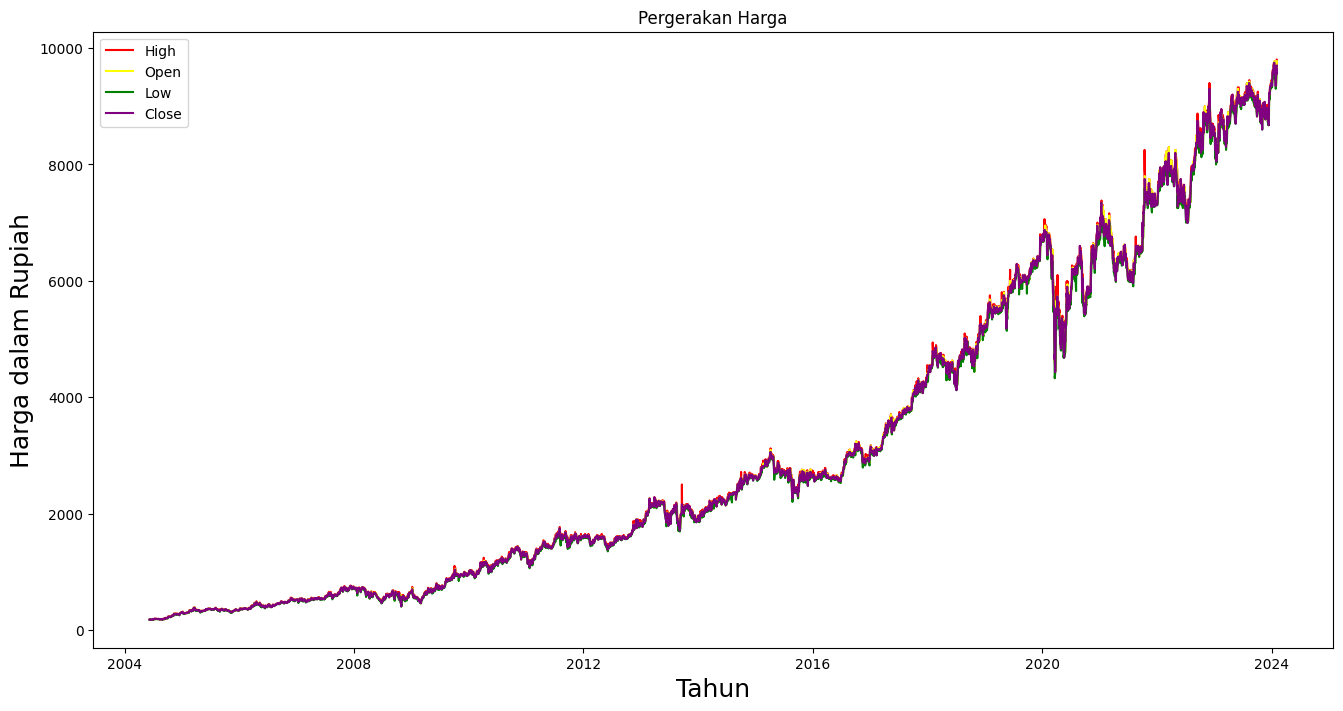

In [13]:
#Visualisasi Dataset

plt.figure(figsize=(16,8))
plt.title('Pergerakan Harga')
plt.plot(high, color = 'red', label = 'High')
plt.plot(open, color = 'yellow', label = 'Open')
plt.plot(low, color = 'green', label = 'Low')
plt.plot(close, color = 'purple', label = 'Close')
plt.xlabel('Tahun', fontsize=18)
plt.ylabel('Harga dalam Rupiah', fontsize=18)
plt.legend(loc='best')
plt.show()

Membuat data frame dari kolom 'High' dan membuat data train & test

In [14]:
data = pd.DataFrame(data_bbca['High'])

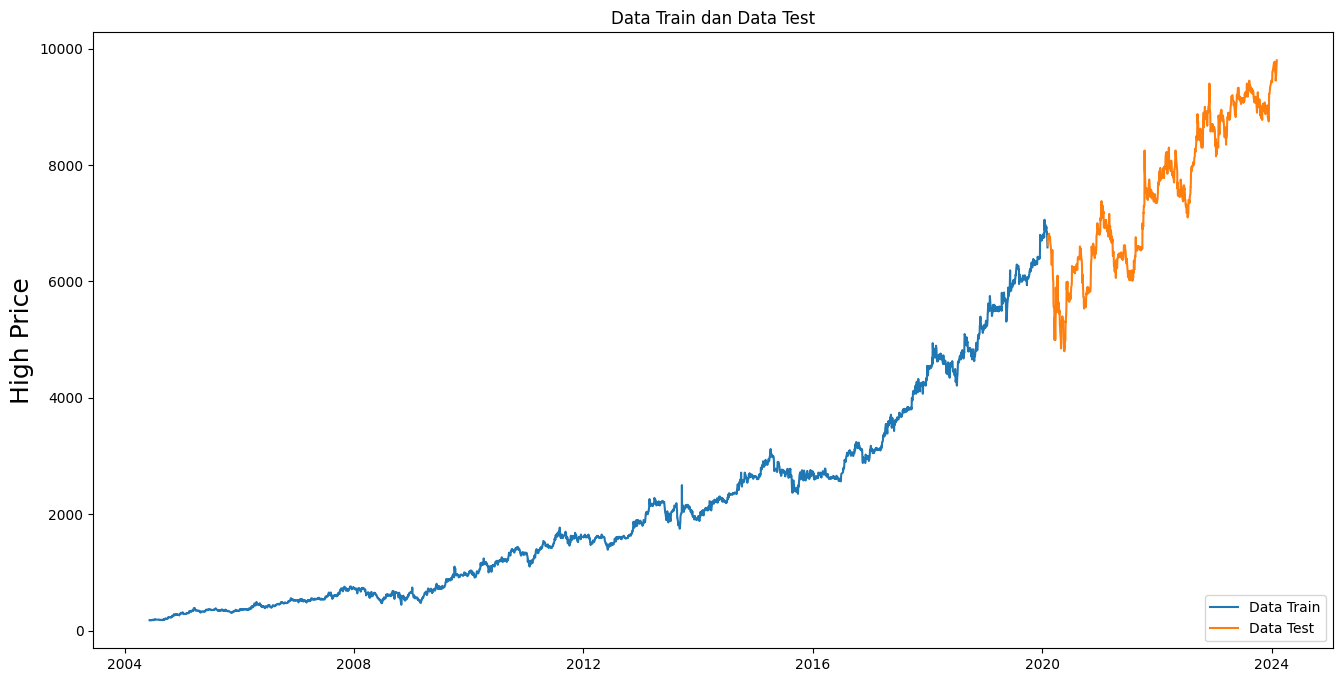

In [15]:
data_bbca_train = data[0:int(len(data)*0.8)]
data_bbca_test = data[int(len(data)*0.8):]
# plot the data
# Visualisasi data
plt.figure(figsize=(16,8))
plt.title('Data Train dan Data Test')
plt.ylabel('High Price', fontsize=18)
plt.plot(data_bbca_train)
plt.plot(data_bbca_test)
plt.legend(['Data Train', 'Data Test'], loc='lower right')
plt.show()

# Preprocessing

Melakukan scaling data dengan kolom High.


In [16]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
dataset = min_max_scaler.fit_transform(data_bbca['High'].values.reshape(-1, 1))

Memecah data menjadi data train dan data test

In [17]:
dataset[0:10]

array([[0.00025981],
       [0.00051962],
       [0.00025981],
       [0.00025981],
       [0.00025981],
       [0.00051962],
       [0.00051962],
       [0.        ],
       [0.        ],
       [0.        ]])

In [18]:
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print("Ukuran training set:", len(train_data))
print("Ukuran testing set:", len(test_data))

3898 975


In [19]:
#Menampilkan panjang/jumlah dataframe
print(len(data_bbca))

4873


Konversi nilai array ke dalam kumpulan matriks


In [20]:
def create_dataset(dataset, look_back=15):
    x, y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        x.append(a)
        y.append(dataset[i + look_back, 0])
    return np.array(x), np.array(y)

In [21]:
look_back = 15
x_train, y_train = create_dataset(train, look_back)
x_test, y_test = create_dataset(test, look_back)

In [22]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3882, 15)
(3882,)
(959, 15)
(959,)


Reshape input menjadi 3D yaitu [samples, time step, dan feature]

In [23]:
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

# Model

Membuat model LSTM

In [24]:
look_back = 15

model1 = Sequential()

model1.add(LSTM(50, input_shape=(1, look_back), return_sequences=False))

# Dropout to prevent overfitting
model1.add(Dropout(0.5))

# Dense layer for classification output
model1.add(Dense(units=1, activation='tanh'))

# Optimizing the neural network weights
opt = tf.keras.optimizers.Adam(learning_rate=0.01)

# Compiling the model with the optimizer
model1.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

history = model1.fit(x_train, y_train, epochs=100, batch_size=64, verbose=2, validation_data=(x_test, y_test))

Epoch 1/100
61/61 - 3s - loss: 0.4277 - accuracy: 0.0000e+00 - val_loss: 0.5362 - val_accuracy: 0.0000e+00 - 3s/epoch - 47ms/step
Epoch 2/100
61/61 - 0s - loss: 0.4045 - accuracy: 0.0000e+00 - val_loss: 0.5198 - val_accuracy: 0.0000e+00 - 222ms/epoch - 4ms/step
Epoch 3/100
61/61 - 0s - loss: 0.4035 - accuracy: 0.0000e+00 - val_loss: 0.5244 - val_accuracy: 0.0000e+00 - 206ms/epoch - 3ms/step
Epoch 4/100
61/61 - 0s - loss: 0.4029 - accuracy: 0.0000e+00 - val_loss: 0.5128 - val_accuracy: 0.0000e+00 - 252ms/epoch - 4ms/step
Epoch 5/100
61/61 - 0s - loss: 0.4032 - accuracy: 0.0000e+00 - val_loss: 0.5188 - val_accuracy: 0.0000e+00 - 210ms/epoch - 3ms/step
Epoch 6/100
61/61 - 0s - loss: 0.4027 - accuracy: 0.0000e+00 - val_loss: 0.5106 - val_accuracy: 0.0000e+00 - 210ms/epoch - 3ms/step
Epoch 7/100
61/61 - 0s - loss: 0.4029 - accuracy: 0.0000e+00 - val_loss: 0.5137 - val_accuracy: 0.0000e+00 - 210ms/epoch - 3ms/step
Epoch 8/100
61/61 - 0s - loss: 0.4023 - accuracy: 0.0000e+00 - val_loss: 0.508

In [25]:
mseplot = model1.compile(loss='mean_squared_error', optimizer=opt, metrics=['mse'])

mseplot = model1.fit(x_train, y_train, epochs = 100, batch_size=64, verbose=2, validation_data=(x_test, y_test))

Epoch 1/100
61/61 - 3s - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0123 - val_mse: 0.0123 - 3s/epoch - 45ms/step
Epoch 2/100
61/61 - 0s - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0085 - val_mse: 0.0085 - 202ms/epoch - 3ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0021 - mse: 0.0021 - val_loss: 0.0081 - val_mse: 0.0081 - 183ms/epoch - 3ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0096 - val_mse: 0.0096 - 141ms/epoch - 2ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0021 - mse: 0.0021 - val_loss: 0.0106 - val_mse: 0.0106 - 209ms/epoch - 3ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0020 - mse: 0.0020 - val_loss: 0.0064 - val_mse: 0.0064 - 200ms/epoch - 3ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0020 - mse: 0.0020 - val_loss: 0.0090 - val_mse: 0.0090 - 192ms/epoch - 3ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0072 - val_mse: 0.0072 - 168ms/epoch - 3ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0021 - mse: 0.0021 - val_loss: 0.0064 - val_mse: 0.0064 -

In [26]:
model1.compile(loss='mse', optimizer=opt, metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')])

rmseplot = model1.fit(x_train, y_train, epochs = 100, batch_size=64, verbose=2, validation_data=(x_test, y_test))

Epoch 1/100
61/61 - 2s - loss: 0.0012 - rmse: 0.0350 - val_loss: 0.0056 - val_rmse: 0.0749 - 2s/epoch - 31ms/step
Epoch 2/100
61/61 - 0s - loss: 0.0014 - rmse: 0.0371 - val_loss: 0.0063 - val_rmse: 0.0793 - 197ms/epoch - 3ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0014 - rmse: 0.0375 - val_loss: 0.0052 - val_rmse: 0.0723 - 195ms/epoch - 3ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0014 - rmse: 0.0369 - val_loss: 0.0066 - val_rmse: 0.0810 - 202ms/epoch - 3ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0013 - rmse: 0.0364 - val_loss: 0.0061 - val_rmse: 0.0778 - 184ms/epoch - 3ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0013 - rmse: 0.0366 - val_loss: 0.0047 - val_rmse: 0.0685 - 243ms/epoch - 4ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0014 - rmse: 0.0373 - val_loss: 0.0031 - val_rmse: 0.0556 - 190ms/epoch - 3ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0014 - rmse: 0.0372 - val_loss: 0.0057 - val_rmse: 0.0756 - 167ms/epoch - 3ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0013 - rmse: 0.0361 - val_loss: 0.0042 - 

In [27]:
score = model1.evaluate(x_train, y_train, batch_size = 32, verbose = 2)
print('Train Accuracy:', score[1])

122/122 - 0s - loss: 5.9140e-05 - rmse: 0.0077 - 144ms/epoch - 1ms/step
Train Accuracy: 0.007690283469855785


# Tuning Test

Membuat tuning test dari hasil model yang telah dibuat dengan menggunakan perbandingan yang lainnya

In [28]:
print("Shape x_train:", x_train.shape)
# Output: (jumlah_sampel, timesteps, features)

# Misalkan y_train adalah dataset target
print("Shape y_train:", y_train.shape)
# Output: (jumlah_sampel,)

# Ambil nilai timesteps dari x_train
timesteps = x_train.shape[1]
print("Timesteps:", timesteps)

# Ambil nilai features dari x_train
features = x_train.shape[2]
print("Features:", features)


Shape x_train: (3882, 1, 15)
Shape y_train: (3882,)
Timesteps: 1
Features: 15


In [29]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.wrappers.scikit_learn import KerasClassifier

# Placeholder values for timesteps and features
timesteps = 1
features = 15

# Fungsi untuk membuat model LSTM
def create_model(units=50, activation='tanh', optimizer='opt'):
    model = Sequential()
    model.add(LSTM(units=units, activation=activation, input_shape=(timesteps, features)))
    model.add(Dense(1))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Membuat objek KerasClassifier
model = KerasClassifier(build_fn=create_model)

# Mendefinisikan hyperparameter yang ingin diuji
param_grid = {
    'units': [50, 100, 200],
    'activation': ['tanh', 'sigmoid'],
    'optimizer': ['adam', 'rmsprop']
}

# Membuat objek GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# Melakukan proses tuning dengan fit
grid_search.fit(x_train, y_train)

# Menampilkan parameter terbaik
print("Parameter terbaik:", grid_search.best_params_)

# Menampilkan skor akurasi terbaik
print("Skor akurasi terbaik:", grid_search.best_score_)

C:\Users\Alfaisal\AppData\Local\Temp\ipykernel_27456\3761055048.py:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model)


122/122 [==============================] - 3s 2ms/step - loss: 4984.1616 - accuracy: 0.0015
Parameter terbaik: {'activation': 'tanh', 'optimizer': 'adam', 'units': 50}
Skor akurasi terbaik: 0.1369369387626648


# Visualisasi Model LSTM

In [30]:
train_predict = model1.predict(x_train)
test_predict = model1.predict(x_test)


# #invert prediksi

train_predict = min_max_scaler.fit_transform(train_predict)
y_train = min_max_scaler.inverse_transform([y_train])

test_predict = min_max_scaler.inverse_transform(test_predict)
y_test = min_max_scaler.inverse_transform([y_test])

#kalkulasi untuk root mean squared error

train_score = math.sqrt(mean_squared_error(y_train[0], train_predict[:,0]))
print('Skor Training: %.2f RMSE' % (train_score))

test_score = math.sqrt(mean_squared_error(y_test[0], test_predict[:,0]))
print('Skor Testing: %.2f RMSE' % (test_score))

#hitung MSE
train_score1 = mean_squared_error(y_train[0], train_predict[:,0])
print('Skor Training: %.2f MSE' % (train_score1))

test_score1 = mean_squared_error(y_test[0], test_predict[:,0])
print('Skor Training: %.2f MSE' % (test_score1))

30/30 [==============================] - 0s 1ms/step
Train score: 0.18 RMSE
Test score: 0.04 RMSE
Train score: 0.03 MSE
Train score: 0.00 MSE


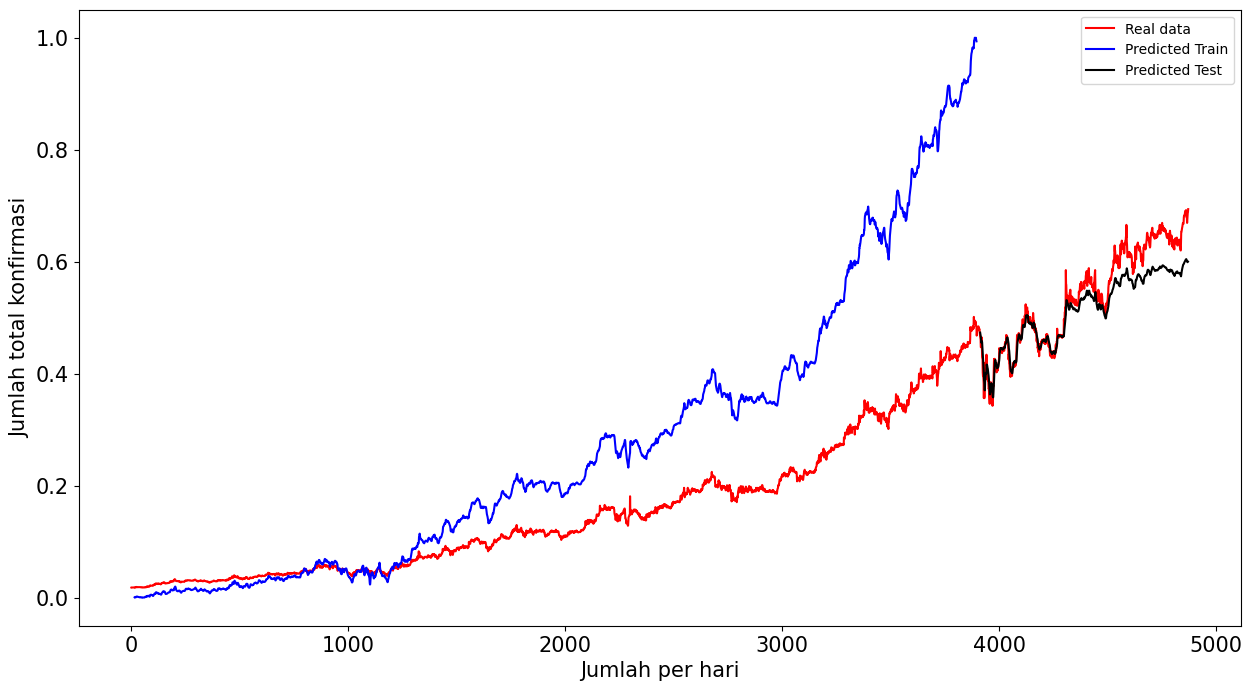

In [31]:
#plotting untuk train prediction
train_predict_plot = np.empty_like(dataset)
train_predict_plot[:, :] = np.nan
train_predict_plot[look_back:len(train_predict)+look_back, :] = train_predict

# plotting untuk test prediction
test_predict_plot = np.empty_like(dataset)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict)+(look_back*2)+1:len(dataset)-1, :] = test_predict

#plot
plt.figure(figsize=(15, 8))
plt.plot(min_max_scaler.inverse_transform(dataset), color='r', label='Real data')
plt.plot(train_predict_plot, color='b', label='Predicted Train')
plt.plot(test_predict_plot, color='black', label = 'Predicted Test')
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel("Jumlah per hari", size=15)
plt.ylabel("Jumlah total konfirmasi", size=15)
plt.legend(loc='best')
plt.show()

# Kesimpulan

- Untuk memprediksi saham, kami menggunakan data BBCA.

- Kami menggunakan algoritma LSTM (Long Short-Term Memory) untuk melakukan prediksi.

- Pada awalnya, kami membuat visualisasi data dengan beberapa kolom: High, Open, Low, dan Close. Namun, kami hanya menggunakan kolom High karena kami ingin menggunakan algoritma ini.

- Kemudian membuat visualisasi antara data latihan dan tes dari kolom High

- Meningkatkan ukuran data dan mengubahnya ke matriks

- Membangun model LSTM menggunakan fungsi Squential(), aktivasi: "tanh" dengan optimizer Adam. Selain itu, kami menggunakan epochs:100 dan menggunakan tes x dan y untuk validasi data.

- Model dievaluasi dan diperoleh Accuracy Train: 0.007017217110842466. Walaupun masih rendah, kami juga melakukan pengaturan tes untuk menentukan parameter mana yang terbaik. Selain itu, setelah tes pengaturan, tunh adalah parameter yang paling cocok untuk digunakan.

- Melakukan kalkulasi root mean squared error untuk membuat visualisasi model LSTM. Outputnya secara keseluruhan tidak mencapai 0, tetapi setidaknya menurut kami itu cukup baik karena perbedaannya tidak terlalu jauh dari 0.

- Membuat plot yang menunjukkan visualisasi dari data asli dan data model LSTM yang telah dibuat; visualisasi ini menunjukkan bahwa data yang dihasilkan tidak terlalu overfitting.

- Menciptakan visualisasi MSE dan epochsuntuKami menyimpulkan bahwa, walaupun LSTM menghasilkan data yang baik, masih terdapat beberapa output yang belum sempurna. Namun, dengan melakukan uji tuning, kita dapat mengevaluasi lebih tepat apakah model yang diterapkan sudah siap untuk digunakan atau tidak.